In [80]:
!pip install scapy

[notice] A new release of pip is available: 23.0.1 -> 24.0


[notice] To update, run: C:\Users\omen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [81]:
from scapy.all import *

# Captura 25 paquetes y los asigna a una variable
paquetes = sniff(count=25)

# Imprime el tipo de variable, la longitud y el contenido de la variable
print("Tipo de variable: ", type(paquetes))
print("Longitud de la variable: ", len(paquetes))
print("Contenido de la variable: ", paquetes)

# Imprime el tipo de dato del primer paquete capturado
print("Tipo de dato del primer paquete capturado: ", type(paquetes[0]))

# Imprime el contenido de los primeros 5 paquetes
print("Contenido de los primeros 5 paquetes:")
for i in range(5):
    print(paquetes[i])


Tipo de variable:  <class 'scapy.plist.PacketList'>
Longitud de la variable:  25
Contenido de la variable:  <Sniffed: TCP:25 UDP:0 ICMP:0 Other:0>
Tipo de dato del primer paquete capturado:  <class 'scapy.layers.l2.Ether'>
Contenido de los primeros 5 paquetes:
Ether / IP / TCP 23.223.28.202:https > 192.168.5.220:57875 A / Raw
Ether / IP / TCP 23.223.28.202:https > 192.168.5.220:57875 PA / Raw
Ether / IP / TCP 192.168.5.220:57875 > 23.223.28.202:https A
Ether / IP / TCP 23.223.28.202:https > 192.168.5.220:57875 A / Raw
Ether / IP / TCP 23.223.28.202:https > 192.168.5.220:57875 PA / Raw


In [82]:
from scapy.all import *
import pandas as pd

# Carga el archivo pcap
paquetes = rdpcap('analisis_paquetes.pcap')

In [83]:
# Imprime los primeros 5 paquetes
for i in range(5):
    print(paquetes[i].show())

###[ Ethernet ]### 
  dst       = 80:37:73:96:9b:db
  src       = 88:e9:fe:6a:92:52
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 961
     id        = 1
     flags     = 
     frag      = 0
     ttl       = 64
     proto     = udp
     chksum    = 0x52e6
     src       = 10.1.10.53
     dst       = 84.54.22.33
     \options   \
###[ UDP ]### 
        sport     = domain
        dport     = domain
        len       = 941
        chksum    = 0xf60e
###[ DNS ]### 
           id        = 12
           qr        = 0
           opcode    = QUERY
           aa        = 0
           tc        = 0
           rd        = 1
           ra        = 0
           z         = 0
           ad        = 0
           cd        = 0
           rcode     = ok
           qdcount   = 1
           ancount   = 0
           nscount   = 0
           arcount   = 0
           \qd        \
            |###[ DNS Question Record ]### 
            |  qname   

In [84]:
# Convierte los paquetes a un DataFrame
data = []
for paquete in paquetes:
    if IP in paquete and (TCP in paquete or UDP in paquete):
        row = {'Src Address': paquete[IP].src, 'Dst Address': paquete[IP].dst, 'Payload': len(paquete)}
        if TCP in paquete:
            row.update({'Src Port': paquete[TCP].sport, 'Dst Port': paquete[TCP].dport})
        elif UDP in paquete:
            row.update({'Src Port': paquete[UDP].sport, 'Dst Port': paquete[UDP].dport})
        data.append(row)
df = pd.DataFrame(data)

In [85]:
# Muestra las primeras 5 filas del DataFrame
print(df.head())

   Src Address  Dst Address  Payload  Src Port  Dst Port
0   10.1.10.53  84.54.22.33      975        53        53
1  84.54.22.33   10.1.10.53       98        53        53
2   10.1.10.53  84.54.22.33      989        53        53
3  84.54.22.33   10.1.10.53       98        53        53
4   10.1.10.53  84.54.22.33     1026        53        53


In [86]:
# Muestra los valores de las columnas solicitadas
print(df[['Src Address', 'Dst Address', 'Src Port', 'Dst Port']])

    Src Address  Dst Address  Src Port  Dst Port
0    10.1.10.53  84.54.22.33        53        53
1   84.54.22.33   10.1.10.53        53        53
2    10.1.10.53  84.54.22.33        53        53
3   84.54.22.33   10.1.10.53        53        53
4    10.1.10.53  84.54.22.33        53        53
..          ...          ...       ...       ...
57  84.54.22.33   10.1.10.53        53        53
58   10.1.10.53  84.54.22.33        53        53
59  84.54.22.33   10.1.10.53        53        53
60   10.1.10.53  84.54.22.33        53        53
61  84.54.22.33   10.1.10.53        53        53

[62 rows x 4 columns]


In [87]:
# Estadísticas
print("IPs origen: ", df['Src Address'].unique())
print("IPs destino: ", df['Dst Address'].unique())
print("IP origen más frecuente: ", df['Src Address'].mode()[0])
ip_origen_frecuente = df[df['Src Address'] == df['Src Address'].mode()[0]]
print("IP destino más frecuente a la que se comunica la IP origen más frecuente: ", ip_origen_frecuente['Dst Address'].mode()[0])
print("Puerto destino al que se comunica la IP origen más frecuente: ", ip_origen_frecuente['Dst Port'].mode()[0])
print("Puertos origen desde los que se comunica la IP origen más frecuente: ", ip_origen_frecuente['Src Port'].unique())

IPs origen:  ['10.1.10.53' '84.54.22.33' '75.75.75.75']
IPs destino:  ['84.54.22.33' '10.1.10.53' '75.75.75.75']
IP origen más frecuente:  10.1.10.53
IP destino más frecuente a la que se comunica la IP origen más frecuente:  84.54.22.33
Puerto destino al que se comunica la IP origen más frecuente:  53
Puertos origen desde los que se comunica la IP origen más frecuente:  [   53 15812 23903]


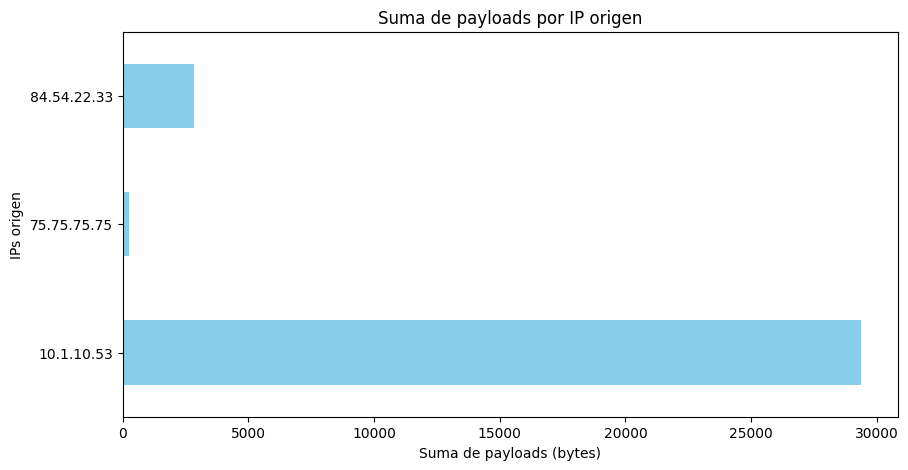

In [88]:
import matplotlib.pyplot as plt

# Calcula la suma de los payloads por IP origen
suma_payloads_origen = df.groupby('Src Address')['Payload'].sum()

# Gráfica de barras 2D horizontales para las IPs origen
plt.figure(figsize=(10,5))
suma_payloads_origen.plot(kind='barh', color='skyblue')
plt.xlabel('Suma de payloads (bytes)')
plt.ylabel('IPs origen')
plt.title('Suma de payloads por IP origen')
plt.show()


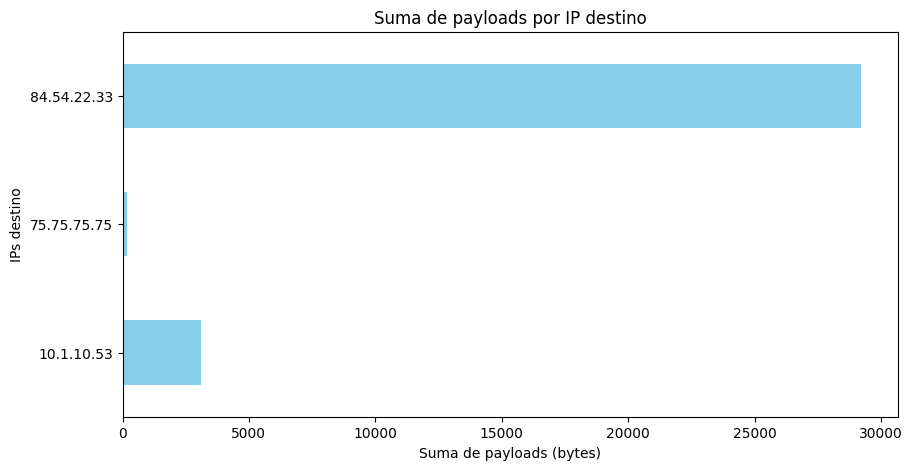

In [89]:
# Calcula la suma de los payloads por IP destino
suma_payloads_destino = df.groupby('Dst Address')['Payload'].sum()

# Gráfica de barras 2D horizontales para las IPs destino
plt.figure(figsize=(10,5))
suma_payloads_destino.plot(kind='barh', color='skyblue')
plt.xlabel('Suma de payloads (bytes)')
plt.ylabel('IPs destino')
plt.title('Suma de payloads por IP destino')
plt.show()


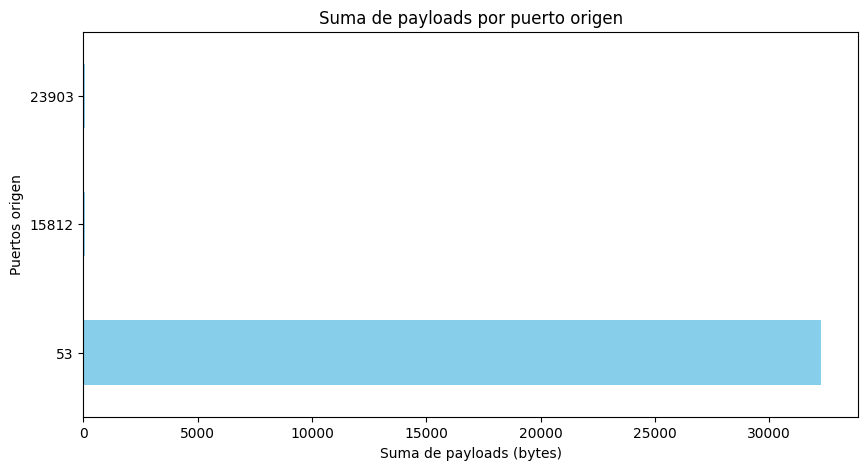

In [90]:
# Calcula la suma de los payloads por puerto origen
suma_payloads_puerto_origen = df.groupby('Src Port')['Payload'].sum()

# Gráfica de barras 2D horizontales para los puertos origen
plt.figure(figsize=(10,5))
suma_payloads_puerto_origen.plot(kind='barh', color='skyblue')
plt.xlabel('Suma de payloads (bytes)')
plt.ylabel('Puertos origen')
plt.title('Suma de payloads por puerto origen')
plt.show()

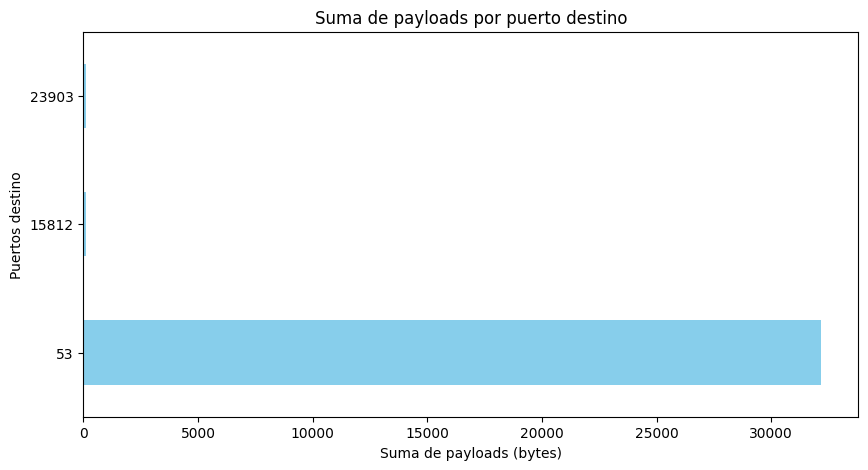

In [91]:
# Calcula la suma de los payloads por puerto destino
suma_payloads_puerto_destino = df.groupby('Dst Port')['Payload'].sum()

# Gráfica de barras 2D horizontales para los puertos destino
plt.figure(figsize=(10,5))
suma_payloads_puerto_destino.plot(kind='barh', color='skyblue')
plt.xlabel('Suma de payloads (bytes)')
plt.ylabel('Puertos destino')
plt.title('Suma de payloads por puerto destino')
plt.show()

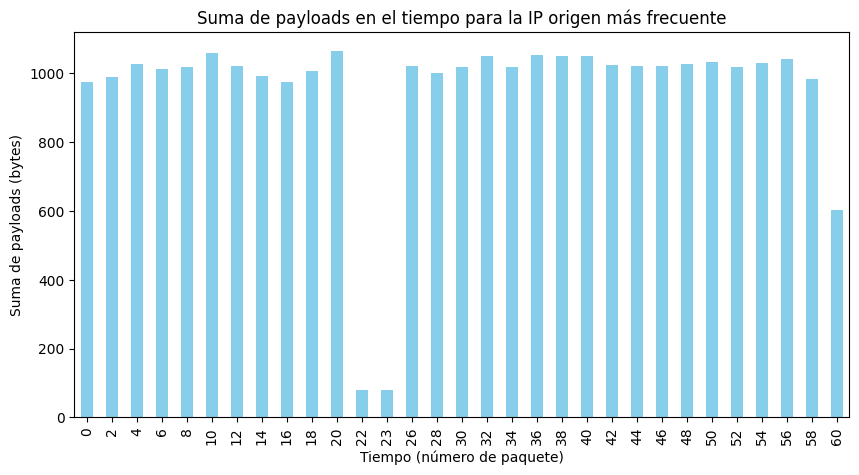

In [92]:
# Gráfica de barras 2D verticales para la IP origen más frecuente
ip_origen_frecuente = df['Src Address'].mode()[0]
df_ip_origen_frecuente = df[df['Src Address'] == ip_origen_frecuente]

# Usa el índice del DataFrame como una aproximación del tiempo
df_ip_origen_frecuente = df_ip_origen_frecuente.reset_index()
suma_payloads_tiempo = df_ip_origen_frecuente.groupby('index')['Payload'].sum()

plt.figure(figsize=(10,5))
suma_payloads_tiempo.plot(kind='bar', color='skyblue')
plt.xlabel('Tiempo (número de paquete)')
plt.ylabel('Suma de payloads (bytes)')
plt.title('Suma de payloads en el tiempo para la IP origen más frecuente')
plt.show()

In [93]:
import numpy as np

# a. Crea un nuevo DF que incluya únicamente las conexiones con la dirección IP origen más frecuente.
ip_origen_frecuente = df['Src Address'].mode()[0]
df_origen_frecuente = df[df['Src Address'] == ip_origen_frecuente]


In [94]:
# b. Crea un nuevo DF que utilice el DF anterior con las columnas src, dst y payload y agrúpalas por dst y la suma del payload.
df_agrupado = df_origen_frecuente.groupby('Dst Address')['Payload'].sum().reset_index()

In [95]:
# c. Obtiene la IP destino que más ha intercambiado bytes con la IP más frecuente.
ip_destino_sospechosa = df_agrupado[df_agrupado['Payload'] == df_agrupado['Payload'].max()]['Dst Address'].values[0]

In [96]:
# d. Crea un nuevo DF con la conversación entre la IP más frecuente y la IP sospechosa.
df_conversacion = df_origen_frecuente[df_origen_frecuente['Dst Address'] == ip_destino_sospechosa]

In [97]:
# e. Obtiene los payloads del DF del inciso anterior, y añade cada uno en un array.
array_payloads = np.array([bytes(paquete) for paquete in df_conversacion['Payload']])

In [98]:
# f. Muestra el contenido del array.
print(array_payloads)

[b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'']


In [99]:
# g. Observa los primeros bytes del contenido.
# Imprime los primeros 10 bytes de cada payload
for i, payload in enumerate(array_payloads):
    print(f"Payload {i+1}: {payload[:10]}")

Payload 1: b''
Payload 2: b''
Payload 3: b''
Payload 4: b''
Payload 5: b''
Payload 6: b''
Payload 7: b''
Payload 8: b''
Payload 9: b''
Payload 10: b''
Payload 11: b''
Payload 12: b''
Payload 13: b''
Payload 14: b''
Payload 15: b''
Payload 16: b''
Payload 17: b''
Payload 18: b''
Payload 19: b''
Payload 20: b''
Payload 21: b''
Payload 22: b''
Payload 23: b''
Payload 24: b''
Payload 25: b''
Payload 26: b''
Payload 27: b''
Payload 28: b''
Payload 29: b''


- Como se observa no se ve nada fuera de lo comun, donde segun entiendo esto es como que la comunicacion normal